In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
# Load MNIST digit dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Flatten input for DNN
x_train_dnn = x_train.reshape(-1, 784)
x_test_dnn = x_test.reshape(-1, 784)

def create_dnn_model():
    initializer = tf.keras.initializers.HeNormal()
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [ ]:
dnn_model = create_dnn_model()
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history_dnn = dnn_model.fit(x_train_dnn, y_train,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=128,
                            callbacks=callbacks,
                            verbose=2)


Epoch 1/50
375/375 - 10s - 26ms/step - accuracy: 0.9043 - loss: 0.3132 - val_accuracy: 0.9579 - val_loss: 0.1344 - learning_rate: 1.0000e-03
Epoch 2/50
375/375 - 9s - 23ms/step - accuracy: 0.9569 - loss: 0.1439 - val_accuracy: 0.9667 - val_loss: 0.1108 - learning_rate: 1.0000e-03
Epoch 3/50
375/375 - 7s - 19ms/step - accuracy: 0.9667 - loss: 0.1065 - val_accuracy: 0.9734 - val_loss: 0.0871 - learning_rate: 1.0000e-03
Epoch 4/50
375/375 - 10s - 27ms/step - accuracy: 0.9731 - loss: 0.0848 - val_accuracy: 0.9762 - val_loss: 0.0803 - learning_rate: 1.0000e-03
Epoch 5/50
375/375 - 9s - 24ms/step - accuracy: 0.9765 - loss: 0.0727 - val_accuracy: 0.9783 - val_loss: 0.0724 - learning_rate: 1.0000e-03
Epoch 6/50
375/375 - 7s - 18ms/step - accuracy: 0.9796 - loss: 0.0630 - val_accuracy: 0.9787 - val_loss: 0.0754 - learning_rate: 1.0000e-03
Epoch 7/50
375/375 - 10s - 28ms/step - accuracy: 0.9817 - loss: 0.0554 - val_accuracy: 0.9796 - val_loss: 0.0721 - learning_rate: 1.0000e-03
Epoch 8/50
375/37

In [ ]:
test_loss_dnn, test_acc_dnn = dnn_model.evaluate(x_test_dnn, y_test, verbose=0)
print(f"DNN Test Accuracy: {test_acc_dnn:.4f}")


DNN Test Accuracy: 0.9818


In [ ]:
# Reshape input for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [ ]:
cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train_cnn, y_train,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=128,
                            callbacks=callbacks,
                            verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 - 185s - 493ms/step - accuracy: 0.9411 - loss: 0.1963 - val_accuracy: 0.1164 - val_loss: 5.9283 - learning_rate: 1.0000e-03
Epoch 2/50
375/375 - 200s - 534ms/step - accuracy: 0.9797 - loss: 0.0656 - val_accuracy: 0.9820 - val_loss: 0.0612 - learning_rate: 1.0000e-03
Epoch 3/50
375/375 - 202s - 539ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9909 - val_loss: 0.0323 - learning_rate: 1.0000e-03
Epoch 4/50
375/375 - 201s - 536ms/step - accuracy: 0.9873 - loss: 0.0403 - val_accuracy: 0.9902 - val_loss: 0.0330 - learning_rate: 1.0000e-03
Epoch 5/50
375/375 - 177s - 471ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9893 - val_loss: 0.0382 - learning_rate: 1.0000e-03
Epoch 6/50
375/375 - 202s - 539ms/step - accuracy: 0.9899 - loss: 0.0306 - val_accuracy: 0.9913 - val_loss: 0.0295 - learning_rate: 1.0000e-03
Epoch 7/50
375/375 - 175s - 465ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9908 - val_loss: 0.0311 - learning_rate: 1.0000e-03

In [8]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {test_acc_cnn:.4f}")


CNN Test Accuracy: 0.9958


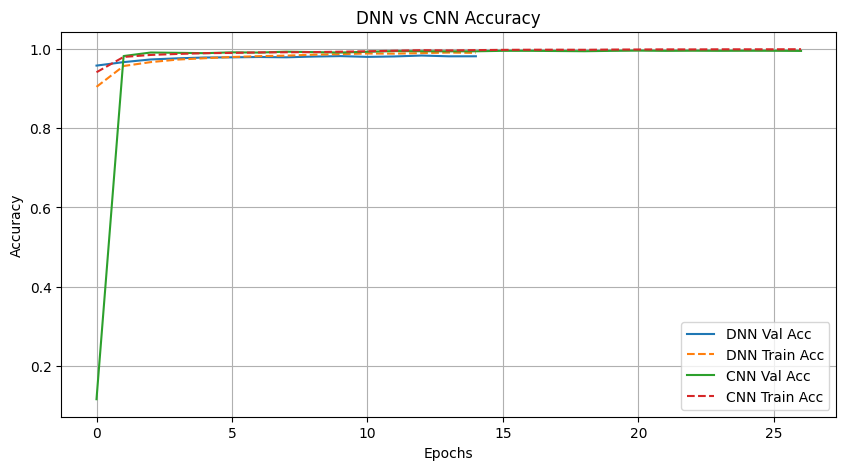

In [12]:
def plot_history(hist, label):
    plt.plot(hist.history['val_accuracy'], label=f'{label} Val Acc')
    plt.plot(hist.history['accuracy'], linestyle='--', label=f'{label} Train Acc')

plt.figure(figsize=(10, 5))
plot_history(history_dnn, 'DNN')
plot_history(history_cnn, 'CNN')
plt.title("DNN vs CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Maximum Achievable Accuracy on MNIST Dataset Using DNN and CNN


Dataset Used
MNIST Digits – 70,000 grayscale images of handwritten digits (0–9), each of size 28x28 pixels. The dataset is split into 60,000 training and 10,000 test images.



To explore, implement, and evaluate:

A Deep Neural Network (DNN)

A Convolutional Neural Network (CNN)

The goal is to compare their architectures, regularization strategies, training behavior, and ultimately their performance in achieving the highest possible accuracy on the MNIST dataset.



From Basic to Best Model
1. Basic Neural Network
Started with a simple fully connected neural network (MLP).

Observed limitations in accuracy and overfitting.

Achieved accuracy was around 92% on test data.

2. Deep Neural Network (DNN)
Improvements included:

 -Batch Normalization

 -Dropout layers for regularization

 -He Initialization for better weight scaling

 -Learning Rate Scheduling (e.g., ReduceLROnPlateau)

 -Early Stopping to prevent overfitting

Test Accuracy:

 -Around 89.83% on Fashion MNIST

 -Around 98.18% on MNIST Digits

3. Convolutional Neural Network (CNN)
Upgraded architecture for image-specific tasks:

 -Convolutional and Pooling layers to extract spatial features

 -Batch Normalization and Dropout for stability and regularization

 -Data Augmentation: rotation, zoom, width/height shift

 -Trained using callbacks for adaptive learning and early stopping

Test Accuracy:

 -Achieved 99.58% on MNIST Digits

